In [39]:
from keras.layers import Input, Conv2D, UpSampling2D
from keras import backend as K
from keras.models import Model
import keras 
import numpy as np 

import os
from matplotlib import pyplot as plt
from skimage import transform as tr
from skimage import io

In [40]:
#function to load samples from dataset and downscale it 
def load(file_list, path, batch_size = 25, random = True, scale = 2, size = 80):
    idx = range(batch_size)
    if random: 
        idx = np.random.choice(len(file_list), batch_size)
    imgs = []
    lr_imgs = []
    for i in idx:
        img = io.imread(path + '/' + file_list[i])
        img = tr.resize(img, [size, size])
        imgs.append(img)
        lr_imgs.append(tr.rescale(img, 1 / scale))
    
    return np.array(imgs), np.array(lr_imgs)

In [3]:
ims, lims = load(os.listdir('./data/'), './data', 5, scale = 2)

E:\Users\L3\AppData\Roaming\Python\Python36\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


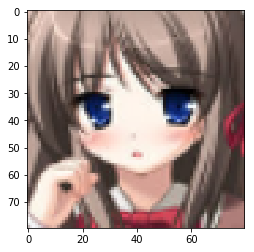

In [4]:
plt.imshow(ims[2])

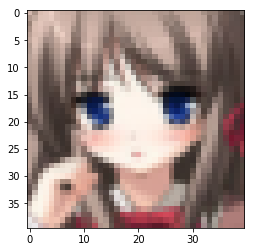

In [5]:
plt.imshow(lims[2])

In [6]:
lims[1].shape

(40, 40, 3)

In [7]:
scale = 2
inputs = Input(shape = [40, 40, 3])
x = UpSampling2D(size = [scale, scale])(inputs)
x = Conv2D(64, [9, 9], padding = 'same', activation = 'relu')(x) # f_1 x f_1 x n_1
x = Conv2D(32, [3, 3], padding = 'same', activation = 'relu')(x) # f_2 x f_2 x n_2
out = Conv2D(3, [5, 5], padding = 'same')(x) # f_3 x f_3 x c

srcnn = Model(inputs = inputs, outputs = out)
srcnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#Training the model 
for i in range(10):
    print ('iter : ' + str(i))
    ims, lims = load(os.listdir('./data/'), './data', 512, scale = 2)
    srcnn.fit(lims, ims, batch_size = 32, epochs = 10)

iter : 0
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
512/512 [==============================] - 16s 31ms/step - loss: 0.0841
Epoch 2/10
512/512 [==============================] - 0s 852us/step - loss: 0.0282
Epoch 3/10
512/512 [==============================] - 0s 853us/step - loss: 0.0167
Epoch 4/10
512/512 [==============================] - 0s 897us/step - loss: 0.0114
Epoch 5/10
512/512 [==============================] - 0s 814us/step - loss: 0.0089
Epoch 6/10
512/512 [==============================] - 0s 838us/step - loss: 0.0072
Epoch 7/10
512/512 [==============================] - 0s 817us/step - loss: 0.0064
Epoch 8/10
512/512 [==============================] - 0s 791us/step - loss: 0.0059
Epoch 9/10
512/512 [==============================] - 0s 797us/step - loss: 0.0052
Epoch 10/10
512/512 [==============================] - 0s 840us/step - loss: 0.0048
iter : 1
Epoch 1/10
512/512 [==============================] - 0s 854us/step - loss: 0.0047
Epoch 2/10
512/512 [

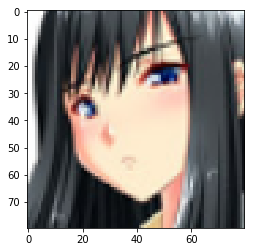

In [36]:
plt.imshow(ims[16])

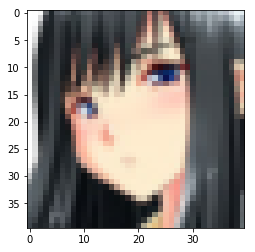

In [37]:
plt.imshow(lims[16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


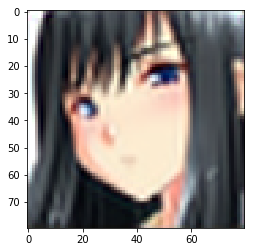

In [38]:
plt.imshow(srcnn.predict(lims[16].reshape([1, 40, 40, 3]))[0])

In [42]:
srcnn.save_weights("./weights/srcnn.h5")